<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 6> APLIED DATA SCIENCE CAPSTONE</font></h1>

##### Table of contents
<ol><li>Introduction: Business Problem</li>
<li>Data</li>
<li>Methodology</li>
<li>Analysis</li>
<li>Results and Discussion</li>
<li>Conclusion</li>
    </ol>
   

# Introduction


 While education improves one’s knowledge, skills and develops the individual personality and attitude, there is a lack of quality Teachers amongst the school in South Africa. The main contributor to this, relies on how the education department attracts quality Educators. With lot of good quality Teachers opting for Urban areas as opposed to rural areas. Then question arise: If most of our quality Teachers are in Urban schools, does this mean the children in rural areas do not deserve quality education?
Hence in this project we recommend to department of education the top 10 schools per district that need urgent intervention based on the quality of education pupil received. This is so that they can place and employ teachers based on the needs of the schools. So that quality of education is the same across. This is done by exposing the current school rating and the areas of interest around the school town.

 
 
 In this project we look into 3 objectives:
* We look into the school Perfomance data
* We llok into the School location data
* We examine the relationship of school Performance vs school Location.
* We recommend TOP 20 School the Department of Basic Education can focus on to improve performance.
* We use Folium and Foursqaure to visulize the schools and their proximity to the Cities. ** Since we belive that the main cause to under perfromning schools, is ude to qulaity teacher not interetedt toteach in rural areas.

# Data Processing and Cleaning

Load the School Perfromance Data for Eastern Cape (EC). Because the Data is contained in 285 pdf report, we only decided to extract th EC info.
<li> This was achieved by extrcating the tables from the PDF using camelot. And the EC data was in page 28-64.

#### About the data
In response to unequal access to quality public schooling, the South African Schools Act was amended in 2005 to establish a quintile system. Under this system, schools are categorised into 5 groups (quintiles) based on the relative wealth of their surrounding communities. Schools in the poorest communities are classified as Quintile 1 and schools serving the wealthiest communities are classified as Quintile 5. Quintile 1, 2 and 3 schools are not allowed to charge fees and are often referred to as no-fee schools.

These schools are entitled to receive a minimum amount of funding per learner (outside staff costs) that is known as the “no fee threshold”. In 2016, this was set at R1,175 per learner per year. Quintile 1, 2 and 3 schools must receive funding from Provincial Education Departments at this minimum amount, while Quintile 4 schools must receive at least R588 per learner and Quintile 5 schools must receive at least R203 per learner.

This dataset is about past loans. The __https://www.sace.org.za/assets/documents/uploads/sace_54588-2020-01-10-2019%20NSC%20School%20Performance%20Report.pdf__ data set includes details of 877 schools from 31 tables scrapped from the PDF rport, for one province only, Eastern Cape.It includes following fields:

| Field         | Description                                                                                         |
|---------------|-----------------------------------------------------------------------------------------------------|
| Achieved      | number of students that passed                                                                      |
| No Progressed | number of students that failed                                                                      |
| Wrote         | total number of stuident taken exam                                                                 |
| Quintile      | Financila support Indicator, 1 mean finance by goverment while 5 mean finace though paying of fees. |
| Centre Name   | school name                                                                                         |
| EMIS No       | school identfier                                                                                    |
| District Name | district to which the school belong                                                                 |

In [762]:
import camelot
import pandas as pd
import tkinter 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
print("library successfuly loaded")

library successfuly loaded


* ### Load Dataset1: School Performance dataframe school

In [763]:
tables=camelot.read_pdf('2019_perf.pdf',split_text=True ,pages='14-44',layout_kwargs={'detect_vertical': False}, shift_text=[''],strip_text=' .\n')
print("done")

done


Show the number of tables read

In [795]:
tables

<TableList n=31>

Traverse each tables and covert into a Panda Dataframe. Each table datframe is sliced from  3 to end of the frame elements. 
We start from 3 because the first tree column are ignored, to make sure the dataframes do not have duplicating headers.

In [796]:
tables
list_t=[]
for table in tables:
    df_k=table.df
    temp_df=df_k[3:df_k.size]
    list_t.append(temp_df)
df = pd.concat(list_t)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
3,,200500039,4241001,A D TSHAYINGCASECONDARY SCHOOL,3,12,252,194,77.0,55,188,153,81.4,86,206,181,87.9,NaN
4,,200500013,4241002,BALENI SENIOR SECONDARYSCHOOL,1,46,101,60,59.4,16,113,73,64.6,26,101,84,83.2,NaN
5,,200500041,4241003,BIZANA SENIOR SECONDARYSCHOOL,3,88,355,265,74.6,91,253,234,92.5,143,309,268,86.7,NaN
6,,200501456,4241004,CANGCI COMPREHENSIVETECHNICAL HIGH,1,46,87,58,66.7,37,83,81,97.6,53,116,103,88.8,NaN
7,,200501404,4241005,CHIEF DUMILE SENIORSECONDARY SCHOOL,1,52,126,115,91.3,71,163,144,88.3,97,128,112,87.5,NaN


Assign the column row in the combined data frame. Delete the last column with NanNs.

In [797]:
df.drop(17, axis=1, inplace=True)

In [798]:
report_columns=['District Name','EMIS No','Centre No','Centre Name','Quintile','2017_No Progressed','2017_Wrote',
                '2017_Achieved','Percentage_2017_Achieved', '2018_No Progressed','2018_Wrote','2018_Achieved',
                'Percentage_2018_Achieved','2019_No Progressed','2019_Wrote','2019_Achieved','Percentage_2019_Achieved']

df.columns=report_columns
df.head()

,District Name,EMIS No,Centre No,Centre Name,Quintile,2017_No Progressed,2017_Wrote,2017_Achieved,Percentage_2017_Achieved,2018_No Progressed,2018_Wrote,2018_Achieved,Percentage_2018_Achieved,2019_No Progressed,2019_Wrote,2019_Achieved,Percentage_2019_Achieved
3,,200500039,4241001,A D TSHAYINGCASECONDARY SCHOOL,3,12,252,194,77.0,55,188,153,81.4,86,206,181,87.9
4,,200500013,4241002,BALENI SENIOR SECONDARYSCHOOL,1,46,101,60,59.4,16,113,73,64.6,26,101,84,83.2
5,,200500041,4241003,BIZANA SENIOR SECONDARYSCHOOL,3,88,355,265,74.6,91,253,234,92.5,143,309,268,86.7
6,,200501456,4241004,CANGCI COMPREHENSIVETECHNICAL HIGH,1,46,87,58,66.7,37,83,81,97.6,53,116,103,88.8
7,,200501404,4241005,CHIEF DUMILE SENIORSECONDARY SCHOOL,1,52,126,115,91.3,71,163,144,88.3,97,128,112,87.5


Rename column EMIS NO to NatEmis. This is the index of the df

In [799]:
df.rename(columns={'EMIS No':'NatEmis'}, inplace = True)

In [800]:
df.shape

(877, 17)

Check the Nans

In [801]:
print("number of NaN values for the column District Name :", df['District Name'].isnull().sum())
print("number of NaN values for the column Centre Name :", df['Centre Name'].isnull().sum())
print("number of NaN values for the column Centre No :", df['Centre No'].isnull().sum())
print("number of NaN values for the column Percentage_2017_Achieved :", df['Percentage_2017_Achieved'].isnull().sum())
print("number of NaN values for the column Percentage_2018_Achieved :", df['Percentage_2018_Achieved'].isnull().sum())
print("number of NaN values for the column Percentage_2019_Achieved :", df['Percentage_2019_Achieved'].isnull().sum())
print("number of NaN values for the column Quintile :", df['Quintile'].isnull().sum())    

number of NaN values for the column District Name : 0
number of NaN values for the column Centre Name : 0
number of NaN values for the column Centre No : 0
number of NaN values for the column Percentage_2017_Achieved : 0
number of NaN values for the column Percentage_2018_Achieved : 0
number of NaN values for the column Percentage_2019_Achieved : 0
number of NaN values for the column Quintile : 0


In [802]:
df.dropna(subset=['Percentage_2017_Achieved', 'Percentage_2018_Achieved','Percentage_2019_Achieved'],inplace=True)
df.dropna(subset=['Percentage_2019_Achieved'],inplace=True)

Covert objects to numeric values for creating graphs visualization

In [803]:
df['NatEmis']=df['NatEmis'].astype('int64')
df['Percentage_2017_Achieved'] = pd.to_numeric(df['Percentage_2017_Achieved'], errors="coerce").astype('float')
df['Percentage_2018_Achieved'] = pd.to_numeric(df['Percentage_2018_Achieved'], errors="coerce").astype('float')
df['Percentage_2019_Achieved'] = pd.to_numeric(df['Percentage_2019_Achieved'], errors="coerce").astype('float')
df['Quintile']=df['Quintile'].astype('int64')


In [804]:
df['2017_Wrote'] = pd.to_numeric(df['2017_Wrote'], errors="coerce").astype('float')
df['2018_Wrote'] = pd.to_numeric(df['2018_Wrote'], errors="coerce").astype('float')
df['2019_Wrote'] = pd.to_numeric(df['2019_Wrote'], errors="coerce").astype('float')

df['2017_Achieved'] = pd.to_numeric(df['2017_Achieved'], errors="coerce").astype('float')
df['2018_Achieved'] = pd.to_numeric(df['2018_Achieved'], errors="coerce").astype('float')
df['2019_Achieved'] = pd.to_numeric(df['2019_Achieved'], errors="coerce").astype('float').astype('int')



In [805]:
df.shape

(877, 17)

Assumimg that the acceptable School pass rate rate is 50%

In [806]:
df.loc[(df.Percentage_2019_Achieved < 50.0),'Results']='FAIL'
df.loc[(df.Percentage_2019_Achieved >=50.0),'Results']='PASS'

In [807]:
df['Results'].replace(to_replace=['PASS','FAIL'], value=[1,0],inplace=True)
df['Results'].value_counts().to_frame()


,Results
1,781
0,96


Select our target variable, which classifies the school based on Neighboring income.

In [808]:
df['Quintile'].value_counts().to_frame()

,Quintile
3,352
1,201
2,190
9,57
5,40
4,37


We see that some of Quuintile are Empty, drop all the columns where quantile is empty=""

In [809]:
df.shape

(877, 18)

In [810]:
dfx=df

In [811]:

#df.drop(df[df.Quintile==9].index, inplace=True)
df=df.loc[df.Quintile!=9]
#df.drop(df[df.Quintile==''].index, inplace=True)
df.shape

(820, 18)

#### Use ONE HOT coding to breakdown the Quintile

In [812]:
df = pd.concat([df,pd.get_dummies(df['Quintile'])], axis=1)
df.rename(columns={1:'Quintile_1',2:'Quintile_2',3:'Quintile_3',4:'Quintile_4',5:'Quintile_5',9:'Quintile_9'}, inplace = True)
#df.tail()

In [813]:
print("number of NaN values for the column Quintile_5 :", df['Quintile_5'].isnull().sum())
print("number of NaN values for the column Quintile_4 :", df['Quintile_4'].isnull().sum())
print("number of NaN values for the column Quintile_5 :", df['Quintile_3'].isnull().sum())
print("number of NaN values for the column Quintile_4 :", df['Quintile_2'].isnull().sum())
#print("number of NaN values for the column Cluster_A :", df['Cluster_A'].isnull().sum())

number of NaN values for the column Quintile_5 : 0
number of NaN values for the column Quintile_4 : 0
number of NaN values for the column Quintile_5 : 0
number of NaN values for the column Quintile_4 : 0


In [814]:
df['Quintile_5'] = pd.to_numeric(df['Quintile_5'], errors="coerce").astype('int')
df['Quintile_4'] = pd.to_numeric(df['Quintile_4'], errors="coerce").astype('int')
df['Quintile_3'] = pd.to_numeric(df['Quintile_3'], errors="coerce").astype('int')
df['Quintile_2'] = pd.to_numeric(df['Quintile_2'], errors="coerce").astype('int')
df['Quintile_1'] = pd.to_numeric(df['Quintile_1'], errors="coerce").astype('int')
#df['Quintile_9'] = pd.to_numeric(df['Quintile_9'], errors="coerce").astype('int')

check the Dataframe size

In [815]:
df.shape

(820, 23)

* ### Load Dataset2: School Location dataframe school

Creates frame that is a subest of the original df_school_info. We rae interested in the following varible:
* Distance to town
* Sector
* Cluster
* EICircuit
* Section 21

In [1828]:
df_school_info= pd.read_excel('resource_260.xlsx')
df_school_info

,NatEmis,Official_Institution_Name,EIDistrict,EICircuit,Cluster,Sector,Phase_DoE,STATUS,Institution_Type,Township_Village,...,DMunName,LMunName,Telephone,Facsimile,GIS_Long,GIS_Lat,Section21,Quintile_2014,School_Manager_Name,E_Mail
0,200100001,A V BUKANI PRIMARY SCHOOL,UITENHAGE,CIRCUIT 4,C,Public,PRIMARY SCHOOL,OPERATIONAL,ORDINARY SCHOOL,NaN,...,Cacadu,Sundays River Valley,422330419.0,422330419,25.71395,-33.52716,Yes,3.0,THAMBO ZJ,avbukani@mweb.co.za
1,200100002,AARON GQADU PRIMARY SCHOOL,PORT ELIZABETH,Circuit 6,C,Public,COMBINED SCHOOL,OPERATIONAL,ORDINARY SCHOOL,NaN,...,Nelson Mandela Bay,Nelson Mandela Bay,414669018.0,414669018,25.58508,-33.86708,No,3.0,KLAAS NM,200100002@vodamail.co.za
2,200100003,ABERDEEN PRIMARY PUBLIC SCHOOL,GRAAFF-REINET,Circuit 2,C,Public,PRIMARY SCHOOL,OPERATIONAL,ORDINARY SCHOOL,NaN,...,Cacadu,Camdeboo,498460031.0,498460045,24.06113,-32.47425,Yes,3.0,MINNAAR JL,abprim@wam.co.za
3,200100005,ABERDEEN SECONDARY SCHOOL,GRAAFF-REINET,Circuit 2,C,Public,SECONDARY SCHOOL,OPERATIONAL,ORDINARY SCHOOL,NaN,...,Cacadu,Camdeboo,498460353.0,498460353,24.06183,-32.47385,Yes,3.0,KAMFER K,aberdeensec@yahoo.co.za
4,200100006,ABRAHAM LEVY PRIMARY SCHOOL,PORT ELIZABETH,Circuit 8,C,Public,PRIMARY SCHOOL,OPERATIONAL,ORDINARY SCHOOL,NaN,...,Nelson Mandela Bay,Nelson Mandela Bay,414533461.0,414533461,25.56570,-33.93000,No,3.0,GEDULD GB,gbgeduld1@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,200999921,Sterkspruit District Office,STERKSPRUIT,TO BE UPDATED,B,Public,NOT APPLICABLE,OPERATIONAL,"EDUCATION OFFICE (HEAD, DISTRICT OR CIRCUIT)",NaN,...,TO BE UPDATED,TO BE UPDATED,516110172.0,516110766,27.35343,-30.53252,NaN,NaN,Mrs N.Y.Kanjana,NaN
6252,200999922,Uitenhage District Office,UITENHAGE,TO BE UPDATED,C,Public,NOT APPLICABLE,OPERATIONAL,"EDUCATION OFFICE (HEAD, DISTRICT OR CIRCUIT)",NaN,...,TO BE UPDATED,TO BE UPDATED,419954001.0,419227659,25.39876,-33.76310,NaN,NaN,Mr W.M.Tyali,NaN
6253,200999923,Mthata District Office,MTHATHA,TO BE UPDATED,B,Public,NOT APPLICABLE,OPERATIONAL,"EDUCATION OFFICE (HEAD, DISTRICT OR CIRCUIT)",NaN,...,TO BE UPDATED,TO BE UPDATED,475024271.0,475313540,28.30332,-32.10022,NaN,NaN,Mr T.T. Dyasi,NaN
6254,200999925,EDUCATION HEAD OFFICE EASTERN CAPE,KING WILLIAMS TOWN,NaN,C,Public,NOT APPLICABLE,OPERATIONAL,"EDUCATION OFFICE (HEAD, DISTRICT OR CIRCUIT)",NaN,...,TO BE UPDATED,TO BE UPDATED,406084200.0,406084249,27.25033,-32.55197,NaN,NaN,MRS NV MAHANJANA,nyameka.tokwe@edu.ecprov.gov.za


In [817]:
print("number of NaN values for the column EIDistrict :", df_school_info['EIDistrict'].isnull().sum())
print("number of NaN values for the column Distance_Closest_Town :", df_school_info['Distance_Closest_Town'].isnull().sum())
print("number of NaN values for the column Sector :", df_school_info['Sector'].isnull().sum())


number of NaN values for the column EIDistrict : 1
number of NaN values for the column Distance_Closest_Town : 611
number of NaN values for the column Sector : 0


In [818]:
df_school_info.dropna(subset=['Section21'],inplace=True)
df_school_info.dropna(subset=['EIDistrict'],inplace=True)
df_school_info.dropna(subset=['Distance_Closest_Town'],inplace=True)

#### Check the Categorical Variables to Numerical  value: <code>Section21</code>,<code>Cluster</code> and <code>Sector</code>  

Lets first align the unique value inside the column and change type to int and convert the <code>Section 21 </code>indicators to [Yes,NO] to [1,0] respectively.

We also convert the <code>Sector</code> to 1 if public and 0 if private

In [820]:
df_school_info['Sector'].replace(to_replace=['Public','Independent/Private'], value=[1,0],inplace=True)
df_school_info['Sector']=df_school_info['Section21'].astype('int64')
df_school_info['Sector'].value_counts().to_frame()

,Sector
1,4376
0,1104


Looking at into the diffrent groups tp convert <code>Cluster</code> into [1,0]

In [821]:
df_school_info['Cluster'].value_counts().to_frame()

,Cluster
B,2022
A,1897
C,1561


#### One Hot Encoding  
##### How about Cluster group? it has more than 2 categorical variables

In [822]:
Feature_location=df_school_info[['NatEmis','Official_Institution_Name','Cluster','EIDistrict','Sector','Closest_Town','Section21','Distance_Closest_Town','GIS_Long','GIS_Lat']]
Feature_location = pd.concat([Feature_location,pd.get_dummies(Feature_location['Cluster'])], axis=1)
Feature_location.rename(columns={'A':'Cluster_A','B':'Cluster_B','C':'Cluster_C'}, inplace = True)
Feature_location.tail()

,NatEmis,Official_Institution_Name,Cluster,EIDistrict,Sector,Closest_Town,Section21,Distance_Closest_Town,GIS_Long,GIS_Lat,Cluster_A,Cluster_B,Cluster_C
6215,200900891,ZWELITSHA ABET SATELLITE CENTRE,A,MALUTI,0,NaN,0,0.0,NaN,NaN,1,0,0
6216,200900892,POLAR PARK ABET SATELLITE CENTRE,A,MALUTI,0,NaN,0,0.0,NaN,NaN,1,0,0
6217,200900893,LUSIKISIKI CORRECTIONAL CENTRE,A,LUSIKISIKI,0,NaN,0,0.0,31.222507,29.3517,1,0,0
6218,200900894,INKWENKWEZI ABET SATELLITE CENTRE,C,EAST LONDON,0,NaN,0,0.0,NaN,NaN,0,0,1
6229,200900905,LANDS END ABET SATELLITE CENTRE,B,MTHATHA,0,NaN,0,0.0,NaN,NaN,0,1,0


### Merge: School Performance dataframe school (df) and School Location dataset(df_school_info)

In [823]:
df_final = pd.merge(df,Feature_location, on='NatEmis', how='left')
df_final

,District Name,NatEmis,Centre No,Centre Name,Quintile,2017_No Progressed,2017_Wrote,2017_Achieved,Percentage_2017_Achieved,2018_No Progressed,...,EIDistrict,Sector,Closest_Town,Section21,Distance_Closest_Town,GIS_Long,GIS_Lat,Cluster_A,Cluster_B,Cluster_C
0,,200500039,4241001,A D TSHAYINGCASECONDARY SCHOOL,3,12,252.0,194.0,77.0,55,...,MBIZANA,1.0,Bizana,1.0,1.0,29.85241,-30.86536,1.0,0.0,0.0
1,,200500013,4241002,BALENI SENIOR SECONDARYSCHOOL,1,46,101.0,60.0,59.4,16,...,MBIZANA,1.0,Bizana,1.0,35.0,29.97034,-31.15619,1.0,0.0,0.0
2,,200500041,4241003,BIZANA SENIOR SECONDARYSCHOOL,3,88,355.0,265.0,74.6,91,...,MBIZANA,1.0,Bizana,1.0,1.0,29.85603,-30.86477,1.0,0.0,0.0
3,,200501456,4241004,CANGCI COMPREHENSIVETECHNICAL HIGH,1,46,87.0,58.0,66.7,37,...,MBIZANA,1.0,Bizana,1.0,27.0,29.90854,-31.09201,1.0,0.0,0.0
4,,200501404,4241005,CHIEF DUMILE SENIORSECONDARY SCHOOL,1,52,126.0,115.0,91.3,71,...,MBIZANA,1.0,Ludeke,1.0,9.0,29.72135,-30.93317,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,,200401143,4291090,WELSH SENIOR SECONDARYSCHOOL,1,22,25.0,19.0,76.0,8,...,QUMBU,1.0,Qumbu,1.0,9.0,28.77968,-31.13737,1.0,0.0,0.0
816,,200400313,4291091,WILO COMPREHENSIVE SS S,3,0,33.0,17.0,51.5,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,,200401150,4291093,XOLILIZWE SANGONI SENIORSECONDARY,3,0,37.0,17.0,45.9,30,...,MTHATHA,1.0,Ngangelizwe,1.0,10.0,28.77260,-31.69280,0.0,1.0,0.0
818,,200401166,4291094,ZAMAKULUNGISA S S S,3,0,223.0,153.0,68.6,83,...,MTHATHA,1.0,Umtata,1.0,10.0,28.70530,-31.64911,0.0,1.0,0.0


Remove Duplicate Columns in the resulting merfed DFs.

In [824]:
col_drop=['District Name', 'Centre Name']
col_drop2=['2016_No Progressed', '2016_Wrote','2016_Achieved',
          '2017_No Progressed', '2017_Wrote','2017_Achieved',
         '2018_No Progressed', '2018_Wrote','2018_Achieved']
df_final.drop(col_drop, axis=1, inplace=True)
#df_final.columns

Check the Nan in the combined DF

In [825]:
df_final.shape

(820, 33)

In [826]:
df_final.dropna(subset=['Section21'],inplace=True)
nan_rows = df_final[df_final["Section21"  ].isnull()]
nan_rows

,NatEmis,Centre No,Quintile,2017_No Progressed,2017_Wrote,2017_Achieved,Percentage_2017_Achieved,2018_No Progressed,2018_Wrote,2018_Achieved,...,EIDistrict,Sector,Closest_Town,Section21,Distance_Closest_Town,GIS_Long,GIS_Lat,Cluster_A,Cluster_B,Cluster_C


# Explolatory Data Analysis

##### Impute improvement between 2017, 2018 and 2019, as a percentage.

In [888]:
df_final['improvement_2018']= pd.to_numeric(( (df_final.Percentage_2018_Achieved -df_final.Percentage_2017_Achieved)/df_final.Percentage_2017_Achieved *100)).astype('float')
df_final['improvement_2019']= pd.to_numeric(( (df_final.Percentage_2019_Achieved -df_final.Percentage_2018_Achieved)/df_final.Percentage_2018_Achieved *100)).astype('float')
df_final.dropna(subset=['improvement_2018','improvement_2019'],inplace=True)
#pd.to_numeric(df['Percentage_2017_Achieved'], errors="coerce")

##### Impute the Average pass rate, per school from past 2 consecutive years

In [1277]:
df_final['AVG_pass_rate']= (round(( df_final.Percentage_2018_Achieved +df_final.Percentage_2017_Achieved)/3 ,0)).astype('float')
df_final['AVG_improvement']= (round((df_final.improvement_2018),0) ).astype('float')
df_final.dropna(subset=['AVG_pass_rate','AVG_improvement','2019_Wrote','Percentage_2019_Achieved'],inplace=True)


##### Add the column for the staus for 2019

In [1278]:
df_final.loc[(df_final.improvement_2019 < 0.0),'Status_2019']='NOT IMPROVED'
df_final.loc[(df_final.improvement_2019 >=0.0),'Status_2019']='IMPROVED'
df_final['Status_2019'].replace(to_replace=['IMPROVED','NOT IMPROVED'], value=[1,0],inplace=True)

##### Classify Average pass rate, as Improved and Not Improved from year on year

In [1279]:
df_final.loc[(df_final.AVG_improvement < 0.0),'Status']='NOT IMPROVED'
df_final.loc[(df_final.AVG_improvement >=0.0),'Status']='IMPROVED'
df_final['Status'].replace(to_replace=['IMPROVED','NOT IMPROVED'], value=[1,0],inplace=True)


df_final['Status'].value_counts().to_frame()

,Status
1,451
0,311


Group the data by District

In [1280]:
df_final['EIDistrict'].value_counts().to_frame()
df_nb=df_final.groupby(['EIDistrict']).mean()
df_pivot=df_nb.reset_index()
df_pivot

,EIDistrict,NatEmis,Quintile,2017_Wrote,2017_Achieved,Percentage_2017_Achieved,2018_Wrote,2018_Achieved,Percentage_2018_Achieved,2019_Wrote,...,GIS_Lat,Cluster_A,Cluster_B,Cluster_C,improvement_2018,improvement_2019,AVG_pass_rate,AVG_improvement,Status,Status_2019
0,BUTTERWORTH,2.003005e+08,2.139535,59.720930,39.348837,67.513953,59.186047,42.860465,70.283721,54.790698,...,-32.335094,0.0,1.0,0.0,9.868190,4.424947,45.976744,9.883721,0.534884,0.581395
1,COFIMVABA,2.005084e+08,2.000000,60.846154,41.576923,61.284615,59.192308,43.538462,68.903846,53.615385,...,-31.941682,0.0,1.0,0.0,22.159072,9.005636,43.500000,22.115385,0.615385,0.538462
2,CRADOCK,2.006005e+08,2.937500,45.187500,33.687500,74.981250,44.062500,33.625000,73.518750,42.000000,...,-31.947719,0.0,0.0,1.0,5.202346,12.247132,49.625000,5.187500,0.375000,0.812500
3,DUTYWA,2.003210e+08,1.735294,118.852941,58.058824,53.350000,97.588235,66.235294,68.611765,79.823529,...,-32.124628,0.0,1.0,0.0,49.794824,22.830005,40.647059,49.764706,0.823529,0.735294
4,EAST LONDON,2.002006e+08,3.160000,70.733333,47.493333,62.576000,67.133333,51.293333,71.580000,61.720000,...,-32.947355,0.0,0.0,1.0,31.027738,17.940843,44.800000,31.040000,0.653333,0.613333
5,FORT BEAUFORT,2.001687e+08,2.756098,38.414634,21.292683,58.900000,35.390244,19.268293,56.012195,32.219512,...,-32.766596,0.0,0.0,1.0,0.316865,56.766566,38.365854,0.341463,0.487805,0.658537
6,KING WILLIAMS TOWN,2.002103e+08,2.829268,52.085366,29.268293,54.447561,50.646341,30.512195,53.393902,45.658537,...,-32.865516,0.0,0.0,1.0,5.956024,28.895871,35.890244,5.951220,0.487805,0.743902
7,LADY FRERE,2.006005e+08,1.880000,46.880000,29.200000,52.864000,44.080000,30.040000,61.804000,37.000000,...,-31.622691,0.0,1.0,0.0,inf,23.446914,38.240000,inf,0.720000,0.520000
8,LIBODE,2.004159e+08,1.525000,131.475000,78.125000,59.225000,120.600000,82.350000,67.070000,110.225000,...,-31.577034,1.0,0.0,0.0,31.586893,19.188757,42.050000,31.625000,0.700000,0.600000
9,LUSIKISIKI,2.005007e+08,1.523810,113.714286,77.904762,66.228571,106.761905,80.285714,75.585714,93.333333,...,-31.221126,1.0,0.0,0.0,22.864036,12.996897,47.285714,22.857143,0.666667,0.809524


Check the Distribution of the Data for the year 2016,2017,2018

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018848753908>]],
      dtype=object)

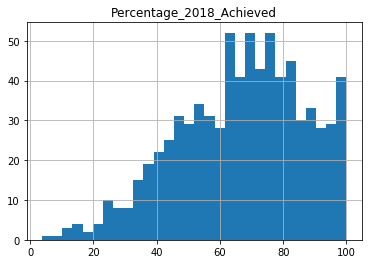

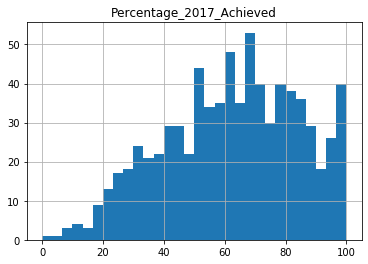

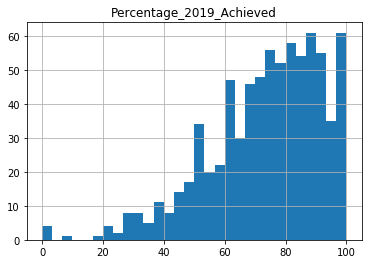

In [1281]:
df_final.hist(column='Percentage_2018_Achieved', bins=30)
df_final.hist(column='Percentage_2017_Achieved', bins=30)
df_final.hist(column='Percentage_2019_Achieved', bins=30)

### Find in Outliers in our Data

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a Paying of School Fees or Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a Paying of School Fees or without a Paying of School Fees have more school performance outliers. Check relation of school perfromance vs Paying of School Fees (Quntile), for 2017

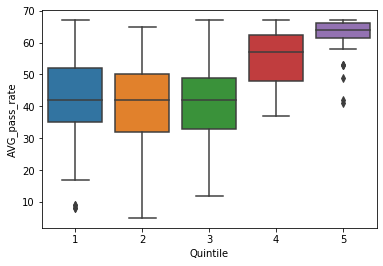

In [1282]:
df_sorted=df_final.sort_values(by=['Quintile'],ascending=False)
sns.boxplot(x="Quintile", y="AVG_pass_rate", data=df_sorted)

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a Paying of School Fees or without a Paying of School Fees have more school performance outliers. Check relation of school perfromance vs Paying of School Fees (Quntile), for 2017

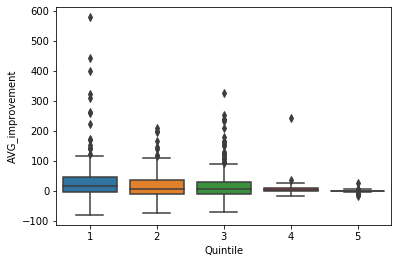

In [1283]:
sns.boxplot(x="Quintile", y="AVG_improvement", data=df_final)

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a Paying of School Fees or without a Paying of School Fees have more school performance outliers. Check relation of school perfromance vs Paying of School Fees (Quntile), for 2018

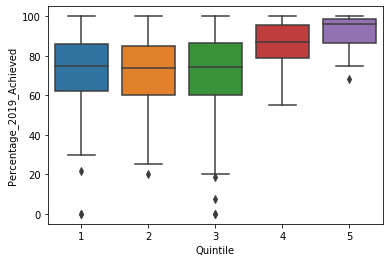

In [1284]:
sns.boxplot(x="Quintile", y="Percentage_2019_Achieved", data=df_sorted)

Check th relation between the Quntile and Results

In [1285]:
df_final.groupby(['AVG_improvement'])['Quintile'].value_counts(normalize=True)

AVG_improvement  Quintile
-81.0            1           1.0
-74.0            2           1.0
-70.0            3           1.0
-69.0            3           1.0
-68.0            2           1.0
                            ... 
 327.0           3           1.0
 398.0           1           1.0
 443.0           1           1.0
 579.0           1           1.0
 inf             1           1.0
Name: Quintile, Length: 377, dtype: float64

### Find relations between target variable and other variables

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>Quntile </code> is negatively or positively correlated with performance.

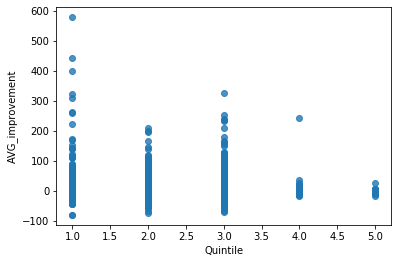

In [1286]:

sns.regplot(x="Quintile", y="AVG_improvement", data=df_final)

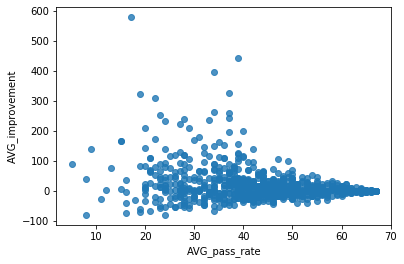

In [1287]:
#tips = sns.load_dataset("tips")
sns.regplot(x="AVG_pass_rate", y="AVG_improvement" ,data=df_final);

In [1288]:
#df_final.columns

In [1289]:
cols=['Percentage_2019_Achieved','2019_Achieved','2019_Wrote','Cluster_A','Quintile_5','Quintile_4']
df_new=df_final[cols]
df_new.head()



,Percentage_2019_Achieved,2019_Achieved,2019_Wrote,Cluster_A,Quintile_5,Quintile_4
0,87.9,181,206.0,1.0,0,0
1,83.2,84,101.0,1.0,0,0
2,86.7,268,309.0,1.0,0,0
3,88.8,103,116.0,1.0,0,0
4,87.5,112,128.0,1.0,0,0


In [1290]:
#df_final.columns
df_final.corr()['Status'].sort_values()
#df_final.corr()#['price'].sort_values()



Percentage_2017_Achieved   -0.380434
improvement_2019           -0.195051
Status_2019                -0.175236
AVG_pass_rate              -0.090479
2017_Achieved              -0.057152
Cluster_C                  -0.054895
2018_Wrote                 -0.050901
Quintile                   -0.050138
Quintile_3                 -0.044469
2019_Wrote                 -0.040356
Quintile_5                 -0.025235
2019_Achieved              -0.023078
Quintile_2                 -0.013347
NatEmis                    -0.007046
Cluster_A                   0.004022
GIS_Lat                     0.009703
2018_Achieved               0.014335
Sector                      0.020090
Section21                   0.020090
Quintile_4                  0.029143
Results                     0.035351
Distance_Closest_Town       0.044802
Cluster_B                   0.052457
Percentage_2019_Achieved    0.056452
GIS_Long                    0.060857
Quintile_1                  0.062679
2017_Wrote                  0.092227
P

In [1794]:
features=['2019_Wrote','2018_Wrote','2017_Wrote','2017_Achieved', 'Percentage_2017_Achieved',  '2018_Achieved',
           'Percentage_2018_Achieved', 'AVG_pass_rate','improvement_2018','Distance_Closest_Town',"Quintile_5", "Quintile_4","Quintile_3", "Quintile_2","Quintile_1"]

cols=['improvement_2018',"Quintile_5", "Quintile_4","Quintile_3", "Quintile_2","Quintile_1",'2019_Wrote','2018_Wrote','2017_Wrote','2017_Achieved', 'Percentage_2017_Achieved',  '2018_Achieved',
           'Percentage_2018_Achieved','Status', '2019_Achieved','Percentage_2019_Achieved','AVG_pass_rate','AVG_improvement','Distance_Closest_Town']
data=df_final[cols]

#### Heat map

In [1795]:
data.corr()

,improvement_2018,Quintile_5,Quintile_4,Quintile_3,Quintile_2,Quintile_1,2019_Wrote,2018_Wrote,2017_Wrote,2017_Achieved,Percentage_2017_Achieved,2018_Achieved,Percentage_2018_Achieved,Status,2019_Achieved,Percentage_2019_Achieved,AVG_pass_rate,AVG_improvement,Distance_Closest_Town
improvement_2018,1.000000,-0.079660,-0.032104,-0.064800,-0.016319,0.146533,-0.123152,-0.155873,0.022496,-0.173872,-0.571743,-0.115448,0.129597,0.514648,-0.118468,-0.033103,-0.264279,0.999988,0.128706
Quintile_5,-0.079660,1.000000,-0.050960,-0.196556,-0.129633,-0.133388,0.177027,0.167884,0.141793,0.298497,0.327731,0.272412,0.294859,-0.025235,0.254140,0.231199,0.345949,-0.079604,-0.185168
Quintile_4,-0.032104,-0.050960,1.000000,-0.185690,-0.122467,-0.126014,0.042515,0.024749,-0.004797,0.051755,0.176089,0.063562,0.186662,0.029143,0.062920,0.144662,0.200527,-0.031941,-0.183142
Quintile_3,-0.064800,-0.196556,-0.185690,1.000000,-0.472360,-0.486044,-0.096814,-0.077136,-0.058749,-0.086285,-0.090104,-0.110968,-0.157511,-0.044469,-0.114532,-0.071654,-0.135979,-0.064919,-0.373547
Quintile_2,-0.016319,-0.129633,-0.122467,-0.472360,1.000000,-0.320557,-0.057174,-0.055520,-0.071629,-0.087488,-0.067639,-0.070038,-0.083556,-0.013347,-0.068081,-0.082847,-0.082508,-0.016386,0.157874
Quintile_1,0.146533,-0.133388,-0.126014,-0.486044,-0.320557,1.000000,0.055946,0.045125,0.067638,0.007335,-0.083047,0.025911,0.021251,0.062679,0.037686,-0.024638,-0.037157,0.146626,0.454209
2019_Wrote,-0.123152,0.177027,0.042515,-0.096814,-0.057174,0.055946,1.000000,0.875753,0.762190,0.843114,0.337468,0.892494,0.338005,-0.040356,0.968968,0.208568,0.373311,-0.123328,-0.067501
2018_Wrote,-0.155873,0.167884,0.024749,-0.077136,-0.055520,0.045125,0.875753,1.000000,0.793336,0.845316,0.283173,0.945063,0.234880,-0.050901,0.867695,0.226466,0.287450,-0.155822,-0.084277
2017_Wrote,0.022496,0.141793,-0.004797,-0.058749,-0.071629,0.067638,0.762190,0.793336,1.000000,0.877139,0.118586,0.771816,0.227441,0.092227,0.760288,0.211048,0.188144,0.022627,-0.054301
2017_Achieved,-0.173872,0.298497,0.051755,-0.086285,-0.087488,0.007335,0.843114,0.845316,0.877139,1.000000,0.455178,0.900871,0.419525,-0.057152,0.882856,0.340771,0.484509,-0.173922,-0.129973


# Module 4: Linear Model 

In [1303]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp_mean.transform(x_features)

Check if there are any inconsitencies

In [1304]:
np.any(np.isnan(data))
np.all(np.isfinite(data))
data.dtypes
df.shape

(820, 24)

In [1305]:
indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
data=data[indices_to_keep].astype(np.float64)

### Linear Regression

We can Fit a linear regression model using the  longitude feature <code>'Quantile_5'</code> and  caculate the R^2.

In [1403]:
from sklearn.linear_model import LinearRegression
X = data[features]
Y = data['Percentage_2019_Achieved']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)


0.39834783621024106

We can Fit a linear regression model using the  longitude feature <code>'2019_wrote'</code> and  caculate the R^2.

#### Use multiple linear regression

In [1404]:

X1 = data[['2019_Wrote','AVG_improvement','Status','Percentage_2018_Achieved','Percentage_2017_Achieved',"Quintile_4","Quintile_3",'Quintile_1']]
Y = data['Percentage_2019_Achieved']
lm = LinearRegression()
lm.fit(X1,Y)
lm.score(X1, Y)

0.362516248963207

###### Polynomial Regression

Create a list of tuples, the first element in the tuple contains the name of the estimator: <code>'scale'</code>, <code>'polynomial'</code>, <code>'model'</code>. The second element in the tuple  contains the model constructor 
<code>StandardScaler()</code>, <code>PolynomialFeatures(include_bias=False)</code>, <code>LinearRegression()</code>

In [1665]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [1666]:
pipe=Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X, Y)

0.34878207073720124

Splitt Data into Traning and Test

In [1802]:
columuns=['Percentage_2017_Achieved','AVG_pass_rate','Percentage_2018_Achieved'  ,'Quintile_5'  ,'2019_Wrote','improvement_2018'
,'AVG_improvement','Results','Status','Status_2019','Percentage_2019_Achieved']

classification_feuatures=['Percentage_2017_Achieved','AVG_pass_rate','Percentage_2018_Achieved'  ,'Quintile_5'  ,'2019_Wrote','improvement_2018'
,'AVG_improvement','Results','Status']

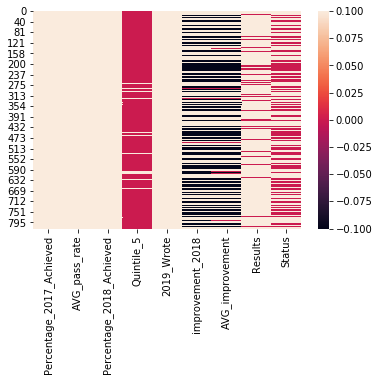

In [1803]:

s=df_final[classification_feuatures]
sns.heatmap(s)

In [1804]:
d=df_final[columuns]
indices_to_keep2 = ~d.isin([np.nan, np.inf, -np.inf]).any(1)
data2=d[indices_to_keep2].astype(np.float64)

In [1805]:
X= data2[classification_feuatures]
Y=data2['Status_2019']
Y2=data2['Percentage_2019_Achieved']


In [1806]:
X = np.asarray(X)
X[0:5]

array([[ 77.        ,  53.        ,  81.4       ,   0.        ,
        206.        ,   5.71428571,   6.        ,   1.        ,
          1.        ],
       [ 59.4       ,  41.        ,  64.6       ,   0.        ,
        101.        ,   8.75420875,   9.        ,   1.        ,
          1.        ],
       [ 74.6       ,  56.        ,  92.5       ,   0.        ,
        309.        ,  23.99463807,  24.        ,   1.        ,
          1.        ],
       [ 66.7       ,  55.        ,  97.6       ,   0.        ,
        116.        ,  46.32683658,  46.        ,   1.        ,
          1.        ],
       [ 91.3       ,  60.        ,  88.3       ,   0.        ,
        128.        ,  -3.28587076,  -3.        ,   1.        ,
          0.        ]])

In [1807]:
Y= np.asarray(Y)
Y2= np.asarray(Y2)
Y[0:5]

array([1., 1., 0., 0., 0.])

Normalize Data

In [1808]:
Y.shape

(761,)

In [1809]:
#X=X[:-1]
X.shape

(761, 9)

#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [1810]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
print("done")

done


In [1811]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [1812]:
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.2, random_state=4)

print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 153
number of training samples: 608


#### Linera Regression using data spliot

In [1813]:
liner_regress = LinearRegression()
liner_regress.fit(X_train,y_train)
y_pred=liner_regress.predict(X_test)
score=liner_regress.score(X_test,y_test)
# Root Mean Squared Error on train and test date
print ("score",score)
print('RMSE on test data: ',  mean_squared_error(y_test, y_pred)**(0.5))

score 0.5429513915300304
RMSE on test data:  12.40726283822611


##### Ridge

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 

In [1822]:
from sklearn.linear_model import Ridge
RigeModel = Ridge(alpha=0.2) 
#lr = RidgeCV(alphas=np.arange(70,100,0.1), fit_intercept=True)
RigeModel.fit(X_train, y_train)
score=RigeModel.score(X_test, y_test)
print('RMSE on test data: ',  mean_squared_error(y_test, y_pred)**(0.5))
print('R2: ',  score)

RMSE on test data:  12.041621217713256
R2:  0.5466882842689038


Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [1823]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)

RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5198681435906853

#### Random Forest Regressor

In [1824]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, max_depth = 10,random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))


Mean Absolute Error: 9.49
Mean Squared Error: 145.0
R-squared scores: 0.57


In [1825]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))


Mean Absolute Error: 9.49
Mean Squared Error: 145.0
R-squared scores: 0.57
Root Mean Squared Error: 12.04


#### Fine Tuning RFR
The R-squared value is not bad, but the errors are high. To improve this situation, we should tune the hyperparameters of the algorithm a little. We can do this manually, but it will take a lot of time. Special tools from sklearn library can help us perform the tuning faster and more effective. One of such tools is GridSearchCV method which will obtain the best parameters for the algorithm.

In [1722]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Find the best parameters for the model
parameters = {
    'max_depth': [70, 80, 90, 100],
    'n_estimators': [900, 1000, 1100]
}
gridforest = GridSearchCV(regressor, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train)
gridforest.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   28.2s finished


{'max_depth': 70, 'n_estimators': 900}

#### XGBOOST

In [1723]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import cv
from sklearn.metrics import accuracy_score

Early stopping
The number of boosted trees (n_estimators) to train is uncapped, rather training continues until validation has not improved in n rounds

In [1826]:
model = XGBRegressor()
model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])


[0]	validation_0-rmse:55.76133
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:40.88352
[2]	validation_0-rmse:30.48717
[3]	validation_0-rmse:23.81883
[4]	validation_0-rmse:19.09506
[5]	validation_0-rmse:16.33820
[6]	validation_0-rmse:14.55601
[7]	validation_0-rmse:13.48643
[8]	validation_0-rmse:12.89082
[9]	validation_0-rmse:12.72135
[10]	validation_0-rmse:12.54468
[11]	validation_0-rmse:12.48453
[12]	validation_0-rmse:12.46914
[13]	validation_0-rmse:12.50237
[14]	validation_0-rmse:12.55619
[15]	validation_0-rmse:12.58263
[16]	validation_0-rmse:12.72599
[17]	validation_0-rmse:12.73194
[18]	validation_0-rmse:12.82638
[19]	validation_0-rmse:12.95951
[20]	validation_0-rmse:13.04670
[21]	validation_0-rmse:13.12186
[22]	validation_0-rmse:13.11080
Stopping. Best iteration:
[12]	validation_0-rmse:12.46914



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1827]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))


Mean Absolute Error: 9.49
Mean Squared Error: 145.0
R-squared scores: 0.57
Root Mean Squared Error: 12.47


In [1726]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

#cv_results = cv(dtrain=X_test, params=params, nfold=3,
              #      num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

## Module 5: Classification Model

LogisticRegression is not for regression but classification ! The Y variable must be the classification class,
(for example 0 or 1) And not a continuous variable, that would be a regression problem.

Below e adjest the targte variable for the Classifiers.

In [1727]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 229
number of training samples: 532


#### KNN

In [1728]:
from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#X[:, 0] = labelencoder.fit_transform(X[:, 0])
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [1729]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.73799127, 0.65938865, 0.71615721, 0.68122271, 0.73362445,
       0.69868996, 0.75982533, 0.74672489, 0.75545852, 0.74235808,
       0.74235808, 0.73362445, 0.7510917 , 0.72489083])

In [1730]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 9
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [1731]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [1732]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7781954887218046
Test set Accuracy:  0.7554585152838428


### Decision Tree

In [1733]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1734]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1735]:
predTree = drugTree.predict(X_test)

In [1736]:
print (predTree [0:5])
print (y_test [0:5])

[1 0 1 0 1]
[1 0 1 0 1]


In [1737]:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7117903930131004


### SVM

In [1738]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1739]:
yhat = SVM_model.predict(X_test)
yhat

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

### LOGISTIC REGRESSION

In [1740]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1741]:
yhat = LR_model.predict(X_test)
yhat

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

# Model Evaluation using Test set

In [1742]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [1743]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.76
KNN F1-score: 0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [1744]:
DT_yhat =drugTree .predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.71
DT F1-score: 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [1745]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.75
SVM F1-score: 0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [1746]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.76
LR F1-score: 0.74
LR LogLoss: 0.51


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### KNN

In [362]:
from sklearn.preprocessing import StandardScaler

X = df_final[x_featuress].values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-2.72165527e-01,  1.56600797e+00,  4.48768201e-01,
         4.48768201e-01],
       [-2.72165527e-01,  1.56600797e+00,  3.74834132e+00,
         3.74834132e+00],
       [-2.72165527e-01,  1.56600797e+00,  6.86718185e-01,
         6.86718185e-01],
       [-2.72165527e-01,  1.56600797e+00,  1.94954884e-01,
         1.94954884e-01],
       [-2.72165527e-01,  1.56600797e+00,  1.81301478e+00,
         1.81301478e+00],
       [-2.72165527e-01,  1.56600797e+00,  1.63228219e-01,
         1.63228219e-01],
       [-2.72165527e-01,  1.56600797e+00,  1.47364887e-01,
         1.47364887e-01],
       [-2.72165527e-01,  1.56600797e+00, -4.71305073e-01,
        -4.71305073e-01],
       [-2.72165527e-01,  1.56600797e+00,  8.39115577e-02,
         8.39115577e-02],
       [-2.72165527e-01,  1.56600797e+00, -8.83751712e-01,
        -8.83751712e-01],
       [ 3.67423461e+00,  1.56600797e+00, -4.87168405e-01,
        -4.87168405e-01],
       [-2.72165527e-01,  1.56600797e+00,  4.59489625e-03,
      

In [1747]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

In [1751]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 2 2 2 2 1 2 1 1 1 0 2 1 1 2 1 0 1 2 2 2 0 2 1 1 2 0 0 1 0
 0 0 1 1 1 0 2 1 1 1 1 1 0 1 1 0 1 0 1 1 2 1 2 1 1 1 2 0 1 0 1 2 2 1 0 1 2
 2 1 0 1 0 0 1 1 2 1 1 0 2 2 1 1 0 0 1 1 1 2 1 2 2 1 1 0 1 2 2 1 2 0 2 1 2
 0 0 1 1 0 1 2 1 1 1 0 1 2 1 1 1 2 1 2 2 0 1 2 1 1 2 0 2 1 2 2 2 0 1 2 1 0
 1 1 1 2 2 2 2 1 1 0 0 1 1 0 1 1 2 1 2 1 1 0 2 1 1 2 0 1 1 1 0 2 0 2 2 2 0
 0 0 0 0 1 1 2 0 0 1 0 2 2 1 0 2 1 0 2 0 0 0 2 0 0 0 0 0 2 2 0 2 2 0 2 0 0
 0 0 2 0 0 2 0 2 0 2 2 0 0 2 2 2 2 0 1 0 2 0 0 1 1 1 0 2 0 2 2 0 0 1 2 1 2
 2 1 0 1 2 1 1 2 1 1 0 1 2 1 1 1 2 0 1 1 1 0 2 2 1 1 2 1 1 2 2 1 2 1 2 1 0
 2 2 2 1 0 0 1 1 2 2 2 1 0 1 1 0 0 2 2 2 1 2 2 2 1 2 0 1 0 2 0 1 0 0 1 1 2
 2 1 2 0 1 1 1 2 0 0 2 1 1 0 2 0 2 0 1 1 2 2 2 1 2 0 1 1 1 1 1 2 0 2 0 2 0
 2 1 1 1 2 2 1 1 1 2 1 2 2 2 2 0 2 2 2 2 2 2 2 1 1 2 2 1 1 1 0 0 2 0 2 0 0
 1 1 2 1 1 2 0 2 2 1 0 1 0 1 2 2 0 1 1 0 1 1 2 1 0 1 1 0 2 1 1 2 2 2 1 1 1
 0 0 0 0 0 2 2 0 2 2 0 1 1 1 2 2 1 1 1 2 1 0 0 0 1 0 1 0 2 2 1 2 0 0 0 1 1
 1 0 2 1 0 0 2 0 2 1 1 2 

In [1755]:
df_final["Clus_km"] = labels
df_final

ValueError: Length of values does not match length of index

In [1829]:
df_final.groupby('Clus_km').mean()

KeyError: 'Clus_km'

In [367]:
df_final['Clus_km'].value_counts().to_frame()

,Clus_km
1,70
4,39
2,21
0,12
3,3


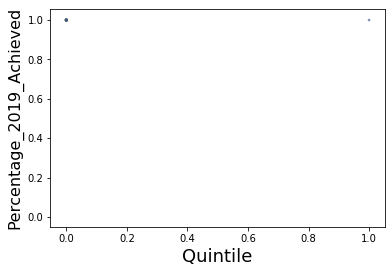

In [368]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Quintile', fontsize=18)
plt.ylabel('Percentage_2019_Achieved', fontsize=16)

plt.show()

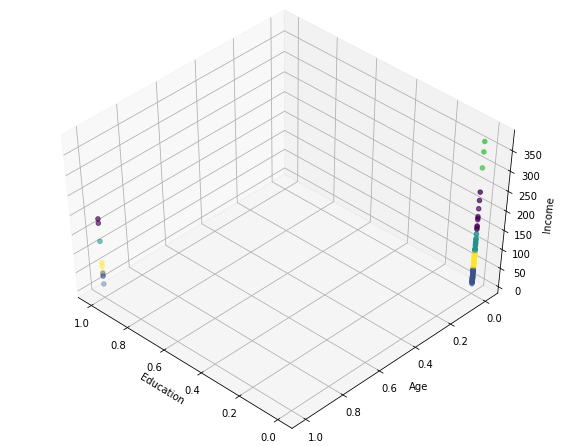

In [369]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 0], X[:, 0], X[:, 2], c= labels.astype(np.float))

## MAP

In [370]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [371]:
import geopy

In [372]:
address = 'Bisho, ZA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queenstown, ZA {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queenstown, ZA -32.8494444, 27.4463889.


#### Define Foursquare

In [1830]:
CLIENT_ID = 'XXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: XXX
CLIENT_SECRET:XXXXXXX


In [1757]:
manhattan_data = df_final.reset_index(drop=True)
manhattan_data.loc[0, 'EIDistrict']

'MBIZANA'

In [1758]:
df_final.columns

Index(['NatEmis', 'Centre No', 'Quintile', '2017_No Progressed', '2017_Wrote',
       '2017_Achieved', 'Percentage_2017_Achieved', '2018_No Progressed',
       '2018_Wrote', '2018_Achieved', 'Percentage_2018_Achieved',
       '2019_No Progressed', '2019_Wrote', '2019_Achieved',
       'Percentage_2019_Achieved', 'Results', 'Quintile_1', 'Quintile_2',
       'Quintile_3', 'Quintile_4', 'Quintile_5', 'Official_Institution_Name',
       'Cluster', 'EIDistrict', 'Sector', 'Closest_Town', 'Section21',
       'Distance_Closest_Town', 'GIS_Long', 'GIS_Lat', 'Cluster_A',
       'Cluster_B', 'Cluster_C', 'improvement_2018', 'improvement_2019',
       'AVG_pass_rate', 'AVG_improvement', 'Status', 'Status_2019'],
      dtype='object')

In [1764]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_final['GIS_Lat'], df_final['GIS_Long'], df_final['EIDistrict'], df_final['Official_Institution_Name']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        legend_name = 'Number of schools per district',
        parse_html=False).add_to(map_newyork)  
    
map_newyork

DE

In [1760]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 10
    radius = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        print(url)
        print(name)
          
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1761]:
manhattan_venues = getNearbyVenues(names=manhattan_data['EIDistrict'],
                                   latitudes=manhattan_data['GIS_Lat'],
                                   longitudes=manhattan_data['GIS_Long']
                                  )

https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.86536,29.85241&radius=500&limit=10
MBIZANA
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5dbcc92ffbe5610008b28a5a', 'name': 'Tyres & More Bizana', 'location': {'address': '36 Hope St', 'lat': -30.8619375, 'lng': 29.8540549, 'labeledLatLngs': [{'label': 'display', 'lat': -30.8619375, 'lng': 29.8540549}], 'distance': 412, 'postalCode': '4800', 'cc': 'ZA', 'city': 'Bizana', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['36 Hope St', 'Bizana', '4800', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d124951735', 'name': 'Automotive Shop', 'pluralName': 'Automotive Shops', 'shortName': 'Automotive', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.936283,29.875367&radius=500&limit=10
MBIZANA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.82411,29.86435&radius=500&limit=10
MBIZANA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.751,29.72674&radius=500&limit=10
MBIZANA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.979033,29.9052&radius=500&limit=10
MBIZANA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBML

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.30523,28.38135&radius=500&limit=10
MALUTI
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.91464,29.31939&radius=500&limit=10
MT FRERE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.89455,29.21281&radius=500&limit=10
MT FRERE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.17255,28.97804&radius=500&limit=10
MALUTI
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBML

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.65916,28.77759&radius=500&limit=10
MT FRERE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.9017,29.0012&radius=500&limit=10
MT FRERE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.26096,28.73651&radius=500&limit=10
MALUTI
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.08201,29.32712&radius=500&limit=10
MT FRERE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBML

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.2151,28.29183&radius=500&limit=10
DUTYWA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.03489,28.98528&radius=500&limit=10
DUTYWA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.35585,28.31808&radius=500&limit=10
BUTTERWORTH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.5974,28.422241&radius=500&limit=10
BUTTERWORTH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEW

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.19994,28.11673&radius=500&limit=10
BUTTERWORTH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.38918,28.62833&radius=500&limit=10
DUTYWA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.48797,28.50997&radius=500&limit=10
BUTTERWORTH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.34706,28.03001&radius=500&limit=10
BUTTERWORTH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOU

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.29594,28.15565&radius=500&limit=10
BUTTERWORTH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.2872,28.10302&radius=500&limit=10
BUTTERWORTH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.02256,28.94595&radius=500&limit=10
DUTYWA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.29826,28.58061&radius=500&limit=10
DUTYWA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEW

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.5592,27.4458&radius=500&limit=10
KING WILLIAMS TOWN
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.89641,27.01032&radius=500&limit=10
FORT BEAUFORT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.24553,27.29279&radius=500&limit=10
KING WILLIAMS TOWN
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.82544,26.98575&radius=500&limit=10
FORT BEAUFORT
[{'reasons': {'count': 0, 'items': [{'summar

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.86228,26.93439&radius=500&limit=10
FORT BEAUFORT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.77781,26.84904&radius=500&limit=10
FORT BEAUFORT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.65265,26.92355&radius=500&limit=10
FORT BEAUFORT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.1405,26.86102&radius=500&limit=10
KING WILLIAMS TOWN
[]
https://api.foursquare.com/v2/venues/explore?

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.56359,27.41574&radius=500&limit=10
KING WILLIAMS TOWN
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50e02d27e4b0c73e7188584c', 'name': 'Stutterheim Golf Course', 'location': {'lat': -32.56610788315905, 'lng': 27.411697893345924, 'labeledLatLngs': [{'label': 'display', 'lat': -32.56610788315905, 'lng': 27.411697893345924}], 'distance': 471, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d1e6941735', 'name': 'Golf Course', 'pluralName': 'Golf Courses', 'shortName': 'Golf Course', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/golfcourse_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count':

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '503dfe05e4b0957094dedc92', 'name': 'Bhisho Dam', 'location': {'lat': -32.854279488094214, 'lng': 27.442117153362595, 'labeledLatLngs': [{'label': 'display', 'lat': -32.854279488094214, 'lng': 27.442117153362595}], 'distance': 253, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d161941735', 'name': 'Lake', 'pluralName': 'Lakes', 'shortName': 'Lake', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/lake_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-503dfe05e4b0957094dedc92-0'}]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.85323,27.98935&radius=500&

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.00234,27.88718&radius=500&limit=10
EAST LONDON
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5231f58511d28440cab97d48', 'name': 'Crescent Take-Aways', 'location': {'lat': -33.001329243442804, 'lng': 27.888868493561365, 'labeledLatLngs': [{'label': 'display', 'lat': -33.001329243442804, 'lng': 27.888868493561365}], 'distance': 193, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d16c941735', 'name': 'Burger Joint', 'pluralName': 'Burger Joints', 'shortName': 'Burgers', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'refe

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.04676,27.59329&radius=500&limit=10
EAST LONDON
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.02006,27.85416&radius=500&limit=10
EAST LONDON
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5e1c72799720170009b89daa', 'name': 'TOPS at SPAR Buffalo Flats', 'location': {'address': 'Douglas Smith Highway', 'lat': -33.01732347, 'lng': 27.85272127, 'labeledLatLngs': [{'label': 'display', 'lat': -33.01732347, 'lng': 27.85272127}], 'distance': 332, 'postalCode': '5209', 'cc': 'ZA', 'city': 'East London', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formatte

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.98618,27.91674&radius=500&limit=10
EAST LONDON
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '518aab6f498e5bc614a65678', 'name': "Jacqeline's", 'location': {'lat': -32.984348, 'lng': 27.920052, 'labeledLatLngs': [{'label': 'display', 'lat': -32.984348, 'lng': 27.920052}], 'distance': 370, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d116941735', 'name': 'Bar', 'pluralName': 'Bars', 'shortName': 'Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-518aab6f498e5bc614a65678-0'}, {'reasons': {'count'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '514d7f98e4b01bb2759d3da6', 'name': "Nando's King William's Town", 'location': {'address': '150 Alexandra Rd', 'lat': -32.8764032, 'lng': 27.39108, 'labeledLatLngs': [{'label': 'display', 'lat': -32.8764032, 'lng': 27.39108}], 'distance': 335, 'postalCode': '5601', 'cc': 'ZA', 'city': 'King William’s Town', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['150 Alexandra Rd', "King William's Town", '5601', 'iNingizimu Afrika']}, 'categories': [{'id': '4def73e84765ae376e57713a', 'name': 'Portuguese Restaurant', 'pluralName': 'Portuguese Restaurants', 'shortName': 'Portuguese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/portuguese_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '551604074'}}, 'referralId': 'e-0-514d7f98e4b01bb2759d3da6-0'}, 

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.69738,28.03414&radius=500&limit=10
EAST LONDON
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.88285,27.7505&radius=500&limit=10
EAST LONDON
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.93042,27.41958&radius=500&limit=10
KING WILLIAMS TOWN
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.92814,27.43979&radius=500&limit=10
KING WILLIAMS TOWN
[]
https://api.foursquare.com/v2/venues/explore

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5d246187bf5e0e0027245e7a', 'name': 'SPAR Buffalo Flats', 'location': {'address': 'Greenpoint Road', 'lat': -33.01730017, 'lng': 27.85275096, 'labeledLatLngs': [{'label': 'display', 'lat': -33.01730017, 'lng': 27.85275096}], 'distance': 433, 'postalCode': '5252', 'cc': 'ZA', 'city': 'East London', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['Greenpoint Road', 'East London', '5252', 'iNingizimu Afrika']}, 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '551701508'}}, 'referralId': 'e-0-5d246187bf5e0e0027245e7a-0'}, {'reasons': {

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.67122,28.35696&radius=500&limit=10
EAST LONDON
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.75133,27.51358&radius=500&limit=10
KING WILLIAMS TOWN
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.94178,27.70376&radius=500&limit=10
EAST LONDON
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.97124,27.81023&radius=500&limit=10
EAST LONDON
[]
https://api.foursquare.com/v2/venues/explore?clien

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f38dcc3e4b0ea2d7f568931', 'name': 'Smiths buy sell and pawn', 'location': {'address': '73 Smith Street', 'lat': -33.03198, 'lng': 27.91006, 'labeledLatLngs': [{'label': 'display', 'lat': -33.03198, 'lng': 27.91006}], 'distance': 492, 'cc': 'ZA', 'city': 'West Street', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['73 Smith Street', 'West Street', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d1f8941735', 'name': 'Furniture / Home Store', 'pluralName': 'Furniture / Home Stores', 'shortName': 'Furniture / Home', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4f38dcc3e4b0ea2d7f568931-0'}]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AA

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5e79e6e40945470007123116', 'name': 'Cashbuild', 'location': {'address': 'High St', 'lat': -31.675114686462127, 'lng': 27.993980577844816, 'labeledLatLngs': [{'label': 'display', 'lat': -31.675114686462127, 'lng': 27.993980577844816}], 'distance': 262, 'postalCode': '5050', 'cc': 'ZA', 'city': 'Engcobo', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['High St', 'Engcobo', '5050', 'iNingizimu Afrika']}, 'categories': [{'id': '5454144b498ec1f095bff2f2', 'name': 'Construction & Landscaping', 'pluralName': 'Construction & Landscaping', 'shortName': 'Construction', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/realestate_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-5e79e6e40945470007123116-0'}]
https://api.foursquare.com/v2/venues/explore?c

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5d246271d0ae5e00236ec904', 'name': 'SUPERSPAR Cofimvaba', 'location': {'address': 'Main Street', 'lat': -32.00159926, 'lng': 27.58212629, 'labeledLatLngs': [{'label': 'display', 'lat': -32.00159926, 'lng': 27.58212629}], 'distance': 495, 'postalCode': '5200', 'cc': 'ZA', 'city': 'Cofimvaba', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['Main Street', 'Cofimvaba', '5200', 'iNingizimu Afrika']}, 'categories': [{'id': '4d954b0ea243a5684a65b473', 'name': 'Convenience Store', 'pluralName': 'Convenience Stores', 'shortName': 'Convenience Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}, 'venuePage': {'id': '553701652'}}, 'referralId': 'e-0-5d246271d0ae5e00236ec904-0'}]
https://api.foursquare.c

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.67288,27.24558&radius=500&limit=10
LADY FRERE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.18461,26.68527&radius=500&limit=10
QUEENSTOWN
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.89255,26.87149&radius=500&limit=10
QUEENSTOWN
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d0dfe9a1f6bf04dfa698031', 'name': 'Buffalo Springs Spur Steak Ranch', 'location': {'address': '125 Cathcart St', 'lat': -31.894942758385458, 'lng

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.9154,27.22713&radius=500&limit=10
LADY FRERE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-32.17939,25.64104&radius=500&limit=10
CRADOCK
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.38297,26.35668&radius=500&limit=10
QUEENSTOWN
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.92459,26.85493&radius=500&limit=10
QUEENSTOWN
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCS

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.39822,26.35938&radius=500&limit=10
QUEENSTOWN
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '517a9ef4498e0b5218de6cdb', 'name': 'Central Liquor Store', 'location': {'lat': -31.395519, 'lng': 26.362839, 'labeledLatLngs': [{'label': 'display', 'lat': -31.395519, 'lng': 26.362839}], 'distance': 445, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d186941735', 'name': 'Liquor Store', 'pluralName': 'Liquor Stores', 'shortName': 'Liquor Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_liquor_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-517a9ef4498

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.55603,26.56827&radius=500&limit=10
QUEENSTOWN
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '52bb539b498e50e2a1519137', 'name': 'Gariep dam', 'location': {'lat': -31.556997646266122, 'lng': 26.568101855586246, 'labeledLatLngs': [{'label': 'display', 'lat': -31.556997646266122, 'lng': 26.568101855586246}], 'distance': 108, 'cc': 'ZA', 'city': 'Garriep dam', 'country': 'iNingizimu Afrika', 'formattedAddress': ['Garriep dam', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d1e4941735', 'name': 'Campground', 'pluralName': 'Campgrounds', 'shortName': 'Campground', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/campground_', 'suffix': '.png'}, 'primary': True}], 'ph

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.69324,26.71539&radius=500&limit=10
STERKSPRUIT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.56385,27.60935&radius=500&limit=10
STERKSPRUIT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.99038,26.33372&radius=500&limit=10
STERKSPRUIT
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ebbd3a0d3e31a8e61a33040', 'name': 'Hagenhuis', 'location': {'lat': -30.99153464924691, 'lng': 26.33242461210056, 'labeledLatLngs': [{'label': 

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.962,27.5941&radius=500&limit=10
STERKSPRUIT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.37649,27.4236&radius=500&limit=10
STERKSPRUIT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.61353,27.15783&radius=500&limit=10
STERKSPRUIT
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-30.9115,28.43&radius=500&limit=10
MT FLETCHER
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCS

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ee4c3b261aff5a34210e6a1', 'name': 'SPAR', 'location': {'lat': -33.94205395909901, 'lng': 25.57025651038315, 'labeledLatLngs': [{'label': 'display', 'lat': -33.94205395909901, 'lng': 25.57025651038315}], 'distance': 157, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ee4c3b261aff5a34210e6a1-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5152e9f8e4b0b775aee9a54d', 'name': 'Pep', 'l

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.91869,25.55126&radius=500&limit=10
PORT ELIZABETH
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e4a926d2271ac3f6bd61269', 'name': 'Beetlestone Road Spar', 'location': {'address': 'Beetlestone Road, Gelvandale', 'lat': -33.921865798759825, 'lng': 25.55333130937069, 'labeledLatLngs': [{'label': 'display', 'lat': -33.921865798759825, 'lng': 25.55333130937069}], 'distance': 401, 'cc': 'ZA', 'city': 'Ibhayi', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['Beetlestone Road, Gelvandale', 'Ibhayi', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d118951735', 'name': 'Grocery Store', 'pluralName': 'Grocery Stores', 'shortName': 'Grocery Store', 'icon': {'prefix'

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4dd110e1b0fb25f6e381df28', 'name': 'Wimpy', 'location': {'address': 'Shop 19 Penford Shopping Centre, Graaf Reinet Street', 'lat': -33.7588889, 'lng': 25.408171, 'labeledLatLngs': [{'label': 'display', 'lat': -33.7588889, 'lng': 25.408171}], 'distance': 469, 'postalCode': '6229', 'cc': 'ZA', 'city': 'Uitenhage', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['Shop 19 Penford Shopping Centre, Graaf Reinet Street', 'Uitenhage', '6229', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d16c941735', 'name': 'Burger Joint', 'pluralName': 'Burger Joints', 'shortName': 'Burgers', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4dd110e1b0fb25f6e381df28-0'}, {'reasons': {'count': 0, 'i

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.89978,25.5401&radius=500&limit=10
PORT ELIZABETH
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4dce535c8877851243f47c7c', 'name': 'Hillside Bakery', 'location': {'address': '3rd Ave Hillside', 'crossStreet': 'btwn Bloukol & Wonderboom str', 'lat': -33.900804761388436, 'lng': 25.53574562072754, 'labeledLatLngs': [{'label': 'display', 'lat': -33.900804761388436, 'lng': 25.53574562072754}], 'distance': 418, 'cc': 'ZA', 'city': 'Ibhayi', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['3rd Ave Hillside (btwn Bloukol & Wonderboom str)', 'Ibhayi', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega', 'pluralName': 'Delis / Bodegas

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b6923ddf964a520269a2be3', 'name': 'Sunridge Village', 'location': {'address': '54 Kragga Kamma Rd.', 'lat': -33.951879820443814, 'lng': 25.526579713927752, 'labeledLatLngs': [{'label': 'display', 'lat': -33.951879820443814, 'lng': 25.526579713927752}], 'distance': 471, 'postalCode': '6045', 'cc': 'ZA', 'city': 'Ibhayi', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['54 Kragga Kamma Rd.', 'Ibhayi', '6045', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d1fd941735', 'name': 'Shopping Mall', 'pluralName': 'Shopping Malls', 'shortName': 'Mall', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4b6923ddf964a520269a2be3-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spo

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50efc25de4b08e1ed95a58a0', 'name': 'Chinese Shop', 'location': {'lat': -33.73199959687169, 'lng': 25.377498588595195, 'labeledLatLngs': [{'label': 'display', 'lat': -33.73199959687169, 'lng': 25.377498588595195}], 'distance': 353, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d108951735', 'name': "Women's Store", 'pluralName': "Women's Stores", 'shortName': "Women's Store", 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_women_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-50efc25de4b08e1ed95a58a0-0'}]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.71406,25.39992&radius=500&limit=10
UITENHAGE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.86887,25.58644&radius=500&limit=10
PORT ELIZABETH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.7965,25.60248&radius=500&limit=10
PORT ELIZABETH
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.75031,25.37582&radius=500&limit=10
UITENHAGE
[]
https://api.foursquare.com/v2/venues/explore?client_id=S

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.89884,25.59521&radius=500&limit=10
PORT ELIZABETH
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f86b8e6e4b000a4179488f5', 'name': 'Sturrock Take Aways', 'location': {'lat': -33.900454650735895, 'lng': 25.594286610579804, 'labeledLatLngs': [{'label': 'display', 'lat': -33.900454650735895, 'lng': 25.594286610579804}], 'distance': 198, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d16e941735', 'name': 'Fast Food Restaurant', 'pluralName': 'Fast Food Restaurants', 'shortName': 'Fast Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.74738,25.40341&radius=500&limit=10
UITENHAGE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.8621,25.30135&radius=500&limit=10
UITENHAGE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.87907,25.56415&radius=500&limit=10
PORT ELIZABETH
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5045b414e4b0d3dcf51ee2ef', 'name': 'Kenanka', 'location': {'lat': -33.883338928222656, 'lng': 25.563364028930664, 'labeledLatLngs': [{'label': 'd

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '50cd8cabe4b01c69ebc3039b', 'name': 'Pep Uitenhage', 'location': {'lat': -33.760162, 'lng': 25.417121, 'labeledLatLngs': [{'label': 'display', 'lat': -33.760162, 'lng': 25.417121}], 'distance': 282, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d102951735', 'name': 'Accessories Store', 'pluralName': 'Accessories Stores', 'shortName': 'Accessories', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/apparel_accessories_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-50cd8cabe4b01c69ebc3039b-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ef4b0d19a528bc5d8a83033', 'name': 'Chris Café', 'loca

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-33.9328,25.52761&radius=500&limit=10
PORT ELIZABETH
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4d779fecf2c054818518aca1', 'name': 'Friends Coffee Bar Metlife Plaza', 'location': {'address': 'Metlife Plaza', 'lat': -33.93578613692214, 'lng': 25.529997533106965, 'labeledLatLngs': [{'label': 'display', 'lat': -33.93578613692214, 'lng': 25.529997533106965}], 'distance': 398, 'postalCode': '6001', 'cc': 'ZA', 'city': 'Ibhayi', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika', 'formattedAddress': ['Metlife Plaza', 'Ibhayi', '6001', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'pre

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.38932,28.96001&radius=500&limit=10
LIBODE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.47401,29.21534&radius=500&limit=10
LIBODE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.49469,29.31454&radius=500&limit=10
LIBODE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.39366,29.4013&radius=500&limit=10
LIBODE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ1

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.45985,29.5511&radius=500&limit=10
LIBODE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.56564,28.87789&radius=500&limit=10
LIBODE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.39504,29.47605&radius=500&limit=10
LIBODE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.46269,28.95951&radius=500&limit=10
LIBODE
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ1

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.18378,29.1087&radius=500&limit=10
QUMBU
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.85315,28.48721&radius=500&limit=10
MTHATHA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.56275,28.78522&radius=500&limit=10
MTHATHA
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '59a7ddcf67e5f236ad12043e', 'name': 'China Town Northcrest', 'location': {'lat': -31.564651, 'lng': 28.785276, 'labeledLatLngs': [{'label': 'display', 'lat': -

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.92495,28.8828&radius=500&limit=10
MTHATHA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.27313,28.69827&radius=500&limit=10
QUMBU
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.7037,28.73436&radius=500&limit=10
MTHATHA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.82738,28.43644&radius=500&limit=10
MTHATHA
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ

[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.2313,28.95785&radius=500&limit=10
QUMBU
[]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.5637,28.79713&radius=500&limit=10
MTHATHA
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5cc74b825bc27d0025f01fbc', 'name': 'Steers', 'location': {'address': 'Erf 2208, Northcrest Caltex, N2 Highway', 'lat': -31.565990712061936, 'lng': 28.796621822090174, 'labeledLatLngs': [{'label': 'display', 'lat': -31.565990712061936, 'lng': 28.796621822090174}], 'distance': 259, 'postalCode': '5099', 'cc': 'ZA', 'city': 'Mthatha', 'state': 'Eastern Cape', 'country': 'iNingizimu Afrika',

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4f49fc2be4b0bd57ab586b9c', 'name': 'News Cafe', 'location': {'address': 'Sandton', 'lat': -31.594651928908018, 'lng': 28.80033356514061, 'labeledLatLngs': [{'label': 'display', 'lat': -31.594651928908018, 'lng': 28.80033356514061}], 'distance': 182, 'cc': 'ZA', 'country': 'iNingizimu Afrika', 'formattedAddress': ['Sandton', 'iNingizimu Afrika']}, 'categories': [{'id': '4bf58dd8d48988d16d941735', 'name': 'Café', 'pluralName': 'Cafés', 'shortName': 'Café', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4f49fc2be4b0bd57ab586b9c-0'}]
https://api.foursquare.com/v2/venues/explore?client_id=SRJ2JOUNCSAEWWUBMLP3GJ13AASMAFMYGUUFTZEKKPCNFVBA&client_secret=L2O5VHSXKPOUNECJOLMWLZBDFQWQUFLMKGB31ZSH0FYGHC0K&v=20180605&ll=-31.0739,2

In [1765]:
manhattan_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,MBIZANA,-30.865360,29.85241,Tyres & More Bizana,-30.861937,29.854055,Automotive Shop
1,MBIZANA,-30.864770,29.85603,Brown's Bizana,-30.861499,29.856340,Convenience Store
2,MBIZANA,-30.864770,29.85603,Tyres & More Bizana,-30.861937,29.854055,Automotive Shop
3,MALUTI,-30.347730,28.81756,Resthaven Guesthouse,-30.345565,28.815229,Bed & Breakfast
4,MT FRERE,-30.896200,28.99790,Shoprite,-30.896512,28.997455,Convenience Store
...,...,...,...,...,...,...,...
224,MTHATHA,-31.592300,28.78630,Plaza Shopping Centre,-31.592200,28.786475,Shopping Mall
225,MTHATHA,-31.592300,28.78630,Nando's Cape Road Drive Thru,-31.588808,28.788061,Portuguese Restaurant
226,MTHATHA,-31.592300,28.78630,KFC Mthatha 4,-31.593200,28.789000,Fried Chicken Joint
227,MTHATHA,-31.592300,28.78630,SADTU (Mthatha),-31.593540,28.790130,Business Service


In [1780]:
pd.DataFrame(manhattan_venues['Venue Category'].value_counts().astype(float))
manhattan_venues[manhattan_venues['Venue Category']=="Business Service"]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
73,EAST LONDON,-32.99402,27.92592,Comprehensive Language Services,-32.992323,27.92234,Business Service
227,MTHATHA,-31.59230,28.78630,SADTU (Mthatha),-31.593540,28.79013,Business Service


# Discussion

Our analysis shows that although there is a great number of restaurants in Berlin (~2000 in our initial area of interest which was 12x12km around Alexanderplatz), there are pockets of low restaurant density fairly close to city center. Highest concentration of restaurants was detected north and west from Alexanderplatz, so we focused our attention to areas south, south-east and east, corresponding to boroughs Kreuzberg, Friedrichshain and south-east corner of central Mitte borough. Another borough was identified as potentially interesting (Prenzlauer Berg, north-east from Alexanderplatz), but our attention was focused on Kreuzberg and Friedrichshain which offer a combination of popularity among tourists, closeness to city center, strong socio-economic dynamics *and* a number of pockets of low restaurant density.

After directing our attention to this more narrow area of interest (covering approx. 5x5km south-east from Alexanderplatz) we first created a dense grid of location candidates (spaced 100m appart); those locations were then filtered so that those with more than two restaurants in radius of 250m and those with an Italian restaurant closer than 400m were removed.

Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Result of all this is 15 zones containing largest number of potential new restaurant locations based on number of and distance to existing venues - both restaurants in general and Italian restaurants particularly. This, of course, does not imply that those zones are actually optimal locations for a new restaurant! Purpose of this analysis was to only provide info on areas close to Berlin center but not crowded with existing restaurants (particularly Italian) - it is entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

# Conclusion

Purpose of this project was to identify Berlin areas close to center with low number of restaurants (particularly Italian restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new Italian restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis (Kreuzberg and Friedrichshain), and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.